**NAS**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to a range of 0 to 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
def create_rnn_model(input_shape, filters1, filters2, kernel_size1, kernel_size2, dense_units):
    model = Sequential()
    model.add(Conv2D(filters1, kernel_size=kernel_size1, activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters2, kernel_size=kernel_size2, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model
def train_and_evaluate_model(model, x_train, y_train, x_test, y_test, epochs=5, batch_size=64):
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))

    score = model.evaluate(x_test, y_test, verbose=0)
    return score[1]  # Return the accuracy
def mining_pool_strategy(num_miners, input_shape, x_train, y_train, x_test, y_test):
    best_accuracy = 0
    best_model = None

    # Define possible hyperparameters for model variations
    filters1_options = [32, 64]
    filters2_options = [64, 128]
    kernel_size1_options = [(3, 3), (5, 5)]
    kernel_size2_options = [(3, 3), (5, 5)]
    dense_units_options = [128, 256]

    for _ in range(num_miners):
        # Randomly select hyperparameters for this miner's model
        filters1 = random.choice(filters1_options)
        filters2 = random.choice(filters2_options)
        kernel_size1 = random.choice(kernel_size1_options)
        kernel_size2 = random.choice(kernel_size2_options)
        dense_units = random.choice(dense_units_options)

        model = create_rnn_model(input_shape, filters1, filters2, kernel_size1, kernel_size2, dense_units)
        accuracy = train_and_evaluate_model(model, x_train, y_train, x_test, y_test)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

    return best_model, best_accuracy

input_shape = x_train.shape[1:]
num_miners = 5  # Number of miners in the pool

best_model, best_accuracy = mining_pool_strategy(num_miners, input_shape, x_train, y_train, x_test, y_test)
print(f"Best accuracy achieved: {best_accuracy:.4f}")



170498071/170498071 [==============================] - 13s 0us/step
Epoch 1/10
782/782 [==============================] - 9s 7ms/step - loss: 1.4781 - accuracy: 0.4687 - val_loss: 1.2420 - val_accuracy: 0.5534
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 1.1224 - accuracy: 0.6049 - val_loss: 1.0796 - val_accuracy: 0.6246
Epoch 3/10
782/782 [==============================] - 4s 6ms/step - loss: 0.9482 - accuracy: 0.6690 - val_loss: 0.9675 - val_accuracy: 0.6635
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.8243 - accuracy: 0.7127 - val_loss: 0.9041 - val_accuracy: 0.6866
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.7191 - accuracy: 0.7485 - val_loss: 0.9947 - val_accuracy: 0.6629
Epoch 6/10
782/782 [==============================] - 4s 6ms/step - loss: 0.6267 - accuracy: 0.7821 - val_loss: 0.8922 - val_accuracy: 0.6971
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.5336

KeyboardInterrupt: 

Epoch 1/5
782/782 [==============================] - 6s 6ms/step - loss: 1.5017 - accuracy: 0.4577 - val_loss: 1.3019 - val_accuracy: 0.5292
Epoch 2/5
782/782 [==============================] - 4s 6ms/step - loss: 1.1419 - accuracy: 0.5987 - val_loss: 1.0672 - val_accuracy: 0.6257
Epoch 3/5
782/782 [==============================] - 4s 6ms/step - loss: 0.9751 - accuracy: 0.6571 - val_loss: 0.9917 - val_accuracy: 0.6581
Epoch 4/5
782/782 [==============================] - 7s 9ms/step - loss: 0.8675 - accuracy: 0.6970 - val_loss: 0.9814 - val_accuracy: 0.6647
Epoch 5/5
782/782 [==============================] - 4s 5ms/step - loss: 0.7794 - accuracy: 0.7281 - val_loss: 0.9320 - val_accuracy: 0.6843
Epoch 1/5
782/782 [==============================] - 9s 8ms/step - loss: 1.4933 - accuracy: 0.4579 - val_loss: 1.2364 - val_accuracy: 0.5585
Epoch 2/5
782/782 [==============================] - 4s 5ms/step - loss: 1.1301 - accuracy: 0.6065 - val_loss: 1.0689 - val_accuracy: 0.6211
Epoch 3/5
782

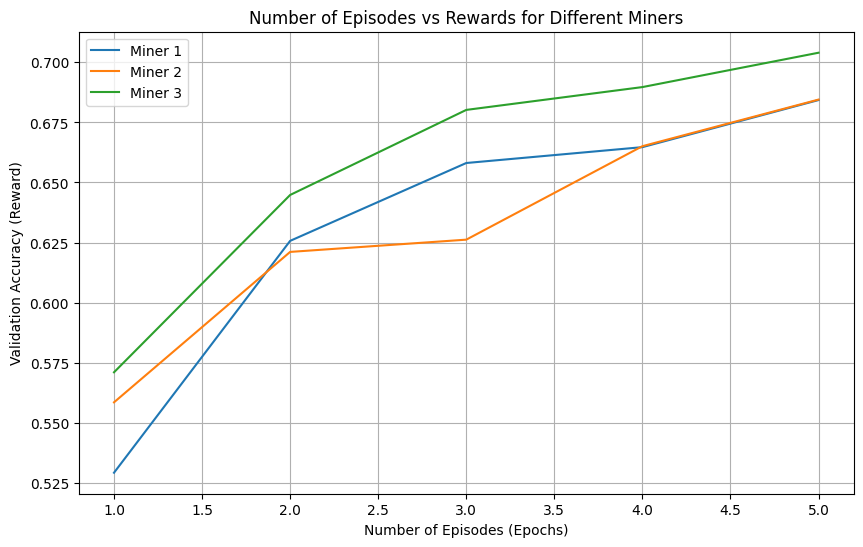

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to a range of 0 to 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
def create_rnn_model(input_shape, filters1, filters2, kernel_size1, kernel_size2, dense_units):
    model = Sequential()
    model.add(Conv2D(filters1, kernel_size=kernel_size1, activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters2, kernel_size=kernel_size2, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model
def train_and_evaluate_model(model, x_train, y_train, x_test, y_test, epochs=10, batch_size=64):
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))

    return history.history['val_accuracy']  # Return validation accuracies for each epoch
def mining_pool_strategy(num_miners, input_shape, x_train, y_train, x_test, y_test, epochs):
    all_accuracies = []

    # Define possible hyperparameters for model variations
    filters1_options = [32, 64]
    filters2_options = [64, 128]
    kernel_size1_options = [(3, 3), (5, 5)]
    kernel_size2_options = [(3, 3), (5, 5)]
    dense_units_options = [128, 256]

    for _ in range(num_miners):
        # Randomly select hyperparameters for this miner's model
        filters1 = random.choice(filters1_options)
        filters2 = random.choice(filters2_options)
        kernel_size1 = random.choice(kernel_size1_options)
        kernel_size2 = random.choice(kernel_size2_options)
        dense_units = random.choice(dense_units_options)

        model = create_rnn_model(input_shape, filters1, filters2, kernel_size1, kernel_size2, dense_units)
        accuracies = train_and_evaluate_model(model, x_train, y_train, x_test, y_test, epochs=epochs)
        all_accuracies.append(accuracies)

    return all_accuracies

input_shape = x_train.shape[1:]
num_miners = 3
epochs = 5  # Number of epochs

all_accuracies = mining_pool_strategy(num_miners, input_shape, x_train, y_train, x_test, y_test, epochs)

# Plotting the results
plt.figure(figsize=(10, 6))
for i, accuracies in enumerate(all_accuracies):
    plt.plot(range(1, epochs + 1), accuracies, label=f'Miner {i + 1}')

plt.xlabel('Number of Episodes (Epochs)')
plt.ylabel('Validation Accuracy (Reward)')
plt.title('Number of Episodes vs Rewards for Different Miners')
plt.legend()
plt.grid(True)
plt.show()


**Meta Learning**

In [ ]:
pip install learn2learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 34.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cus

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import random

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to a range of 0 to 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

def create_rnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

def train_on_subset(model, x_subset, y_subset, epochs=1, batch_size=32):
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    history = model.fit(x_subset, y_subset, batch_size=batch_size, epochs=epochs, verbose=0)
    return history.history['loss'][-1], history.history['accuracy'][-1]

def meta_train_and_evaluate(num_miners, input_shape, x_train, y_train, x_test, y_test, meta_epochs=10, miner_epochs=1):
    meta_model = create_rnn_model(input_shape)
    best_accuracy = 0
    best_weights = None

    for meta_epoch in range(meta_epochs):
        miner_weights = []
        print(f"Meta Epoch {meta_epoch + 1}/{meta_epochs}")

        for miner in range(num_miners):
            model = create_rnn_model(input_shape)
            model.set_weights(meta_model.get_weights())

            # Sample a small subset of the training data
            subset_indices = np.random.choice(len(x_train), size=1000, replace=False)
            x_subset = x_train[subset_indices]
            y_subset = y_train[subset_indices]

            loss, accuracy = train_on_subset(model, x_subset, y_subset, epochs=miner_epochs)
            miner_weights.append(model.get_weights())

            print(f"  Miner {miner + 1}/{num_miners} - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

        # Average the weights from all miners
        new_weights = [np.mean([miner_weight[layer] for miner_weight in miner_weights], axis=0) for layer in range(len(meta_model.get_weights()))]
        meta_model.set_weights(new_weights)

        # Evaluate the meta-model on the test set
        meta_model.compile(loss=tf.keras.losses.categorical_crossentropy,
                           optimizer=Adam(),
                           metrics=['accuracy'])
        score = meta_model.evaluate(x_test, y_test, verbose=0)

        print(f"  Meta Model - Loss: {score[0]:.4f}, Accuracy: {score[1]:.4f}")

        if score[1] > best_accuracy:
            best_accuracy = score[1]
            best_weights = meta_model.get_weights()

    meta_model.set_weights(best_weights)
    return meta_model, best_accuracy

input_shape = x_train.shape[1:]
num_miners = 5  # Number of miners in the pool

best_model, best_accuracy = meta_train_and_evaluate(num_miners, input_shape, x_train, y_train, x_test, y_test)
print(f"Best accuracy achieved: {best_accuracy:.4f}")


Meta Epoch 1/10
  Miner 1/5 - Loss: 2.2691, Accuracy: 0.1590
  Miner 2/5 - Loss: 2.2666, Accuracy: 0.1370
  Miner 3/5 - Loss: 2.2530, Accuracy: 0.1580
  Miner 4/5 - Loss: 2.2696, Accuracy: 0.1330
  Miner 5/5 - Loss: 2.2430, Accuracy: 0.1570
  Meta Model - Loss: 2.1829, Accuracy: 0.2114
Meta Epoch 2/10
  Miner 1/5 - Loss: 2.0829, Accuracy: 0.2280
  Miner 2/5 - Loss: 2.0800, Accuracy: 0.2160
  Miner 3/5 - Loss: 2.0893, Accuracy: 0.2330
  Miner 4/5 - Loss: 2.1112, Accuracy: 0.2280
  Miner 5/5 - Loss: 2.1287, Accuracy: 0.2160
  Meta Model - Loss: 1.9717, Accuracy: 0.2851
Meta Epoch 3/10
  Miner 1/5 - Loss: 1.9661, Accuracy: 0.2970
  Miner 2/5 - Loss: 1.9676, Accuracy: 0.2780
  Miner 3/5 - Loss: 1.9260, Accuracy: 0.3020
  Miner 4/5 - Loss: 1.9516, Accuracy: 0.2800
  Miner 5/5 - Loss: 1.9138, Accuracy: 0.3100
  Meta Model - Loss: 1.8181, Accuracy: 0.3583
Meta Epoch 4/10
  Miner 1/5 - Loss: 1.9214, Accuracy: 0.3110
  Miner 2/5 - Loss: 1.8940, Accuracy: 0.3040
  Miner 3/5 - Loss: 1.8387, Accur

Meta Epoch 1/10
  Miner 1/3 - Loss: 1.5534, Accuracy: 0.4510
  Miner 2/3 - Loss: 1.6621, Accuracy: 0.4140
  Miner 3/3 - Loss: 1.5833, Accuracy: 0.4490
  Meta Model - Loss: 1.8560, Accuracy: 0.3398
Meta Epoch 2/10
  Miner 1/3 - Loss: 1.2245, Accuracy: 0.5650
  Miner 2/3 - Loss: 1.2191, Accuracy: 0.5830
  Miner 3/3 - Loss: 1.1981, Accuracy: 0.5910
  Meta Model - Loss: 1.5041, Accuracy: 0.4624
Meta Epoch 3/10
  Miner 1/3 - Loss: 0.9935, Accuracy: 0.6700
  Miner 2/3 - Loss: 0.9643, Accuracy: 0.6700
  Miner 3/3 - Loss: 0.9826, Accuracy: 0.6630
  Meta Model - Loss: 1.4349, Accuracy: 0.4897
Meta Epoch 4/10
  Miner 1/3 - Loss: 0.8516, Accuracy: 0.7210
  Miner 2/3 - Loss: 0.8333, Accuracy: 0.7090
  Miner 3/3 - Loss: 0.7300, Accuracy: 0.7510
  Meta Model - Loss: 1.3861, Accuracy: 0.5209
Meta Epoch 5/10
  Miner 1/3 - Loss: 0.6803, Accuracy: 0.7660
  Miner 2/3 - Loss: 0.7390, Accuracy: 0.7600
  Miner 3/3 - Loss: 0.7373, Accuracy: 0.7440
  Meta Model - Loss: 1.3468, Accuracy: 0.5335
Meta Epoch 6/10

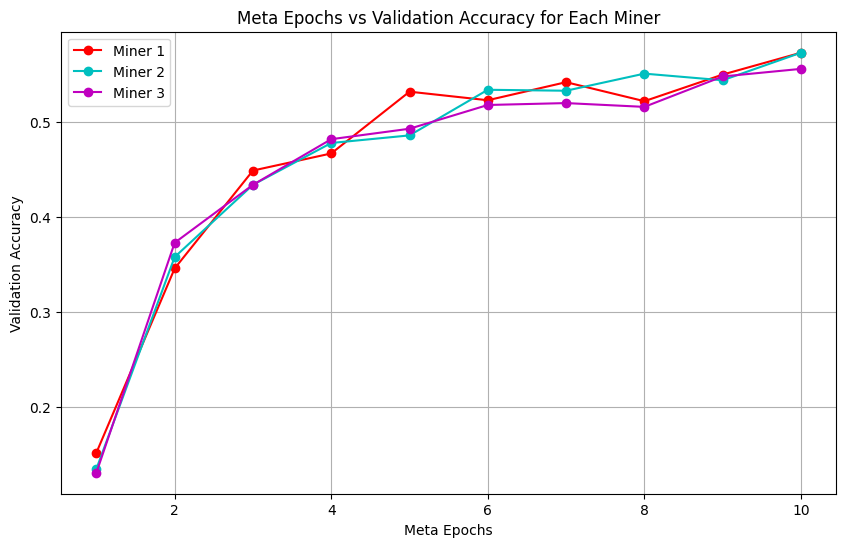

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to a range of 0 to 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

def create_rnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

def train_on_subset(model, x_subset, y_subset, epochs=1, batch_size=32):
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    history = model.fit(x_subset, y_subset, batch_size=batch_size, epochs=epochs, verbose=0)
    return history.history['loss'][-1], history.history['accuracy'][-1], history.history['accuracy']

def meta_train_and_evaluate(num_miners, input_shape, x_train, y_train, x_test, y_test, meta_epochs=10, miner_epochs=1):
    meta_model = create_rnn_model(input_shape)
    best_accuracy = 0
    best_weights = None

    miner_accuracies = [[] for _ in range(num_miners)]  # List to store each miner's accuracies at each meta epoch

    for meta_epoch in range(meta_epochs):
        miner_weights = []
        print(f"Meta Epoch {meta_epoch + 1}/{meta_epochs}")

        for miner in range(num_miners):
            model = create_rnn_model(input_shape)
            model.set_weights(meta_model.get_weights())

            # Sample a small subset of the training data
            subset_indices = np.random.choice(len(x_train), size=1000, replace=False)
            x_subset = x_train[subset_indices]
            y_subset = y_train[subset_indices]

            loss, accuracy, accuracies = train_on_subset(model, x_subset, y_subset, epochs=miner_epochs)
            miner_weights.append(model.get_weights())

            print(f"  Miner {miner + 1}/{num_miners} - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
            miner_accuracies[miner].append(accuracies[0])  # Append this miner's accuracy for this epoch

        # Average the weights from all miners
        new_weights = [np.mean([miner_weight[layer] for miner_weight in miner_weights], axis=0) for layer in range(len(meta_model.get_weights()))]
        meta_model.set_weights(new_weights)

        # Evaluate the meta-model on the test set
        meta_model.compile(loss=tf.keras.losses.categorical_crossentropy,
                           optimizer=Adam(),
                           metrics=['accuracy'])
        score = meta_model.evaluate(x_test, y_test, verbose=0)

        print(f"  Meta Model - Loss: {score[0]:.4f}, Accuracy: {score[1]:.4f}")

        if score[1] > best_accuracy:
            best_accuracy = score[1]
            best_weights = meta_model.get_weights()

    meta_model.set_weights(best_weights)
    return meta_model, best_accuracy, miner_accuracies

input_shape = x_train.shape[1:]
num_miners = 3  # Number of miners in the pool
meta_epochs = 10
miner_epochs = 5

best_model, best_accuracy, miner_accuracies = meta_train_and_evaluate(num_miners, input_shape, x_train, y_train, x_test, y_test, meta_epochs, miner_epochs)
print(f"Best accuracy achieved: {best_accuracy:.4f}")

# Plotting the results for each miner
plt.figure(figsize=(10, 6))
colors = ['r', 'c', 'm']  # Define colors for different miners
for i in range(num_miners):
    plt.plot(range(1, len(miner_accuracies[i]) + 1), miner_accuracies[i], marker='o', color=colors[i % len(colors)], label=f'Miner {i + 1}')

plt.xlabel('Meta Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Meta Epochs vs Validation Accuracy for Each Miner')
plt.legend()
plt.grid(True)
plt.show()
